In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv(r"D:\GeakMinds Internship\real world projects\datasets\Online Sales Data.csv")
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df['Total Revenue'] = df['Units Sold'] * df['Unit Price']  # Recalculate if needed
df['Month'] = df['Date'].dt.to_period('M').astype(str)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    240 non-null    int64         
 1   Date              240 non-null    datetime64[ns]
 2   Product Category  240 non-null    object        
 3   Product Name      240 non-null    object        
 4   Units Sold        240 non-null    int64         
 5   Unit Price        240 non-null    float64       
 6   Total Revenue     240 non-null    float64       
 7   Region            240 non-null    object        
 8   Payment Method    240 non-null    object        
 9   Month             240 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 18.9+ KB


In [18]:
numeric_cols = df.select_dtypes(include=['number'])

skewness = numeric_cols.skew()

skewness

Transaction ID    0.000000
Units Sold        1.620895
Unit Price        4.566664
Total Revenue     3.523183
dtype: float64

In [19]:
df['Units Sold'] = np.log1p(df['Units Sold'])
df['Unit Price'] = np.log1p(df['Unit Price'])
df['Total Revenue'] = np.log1p(df['Total Revenue'])


In [21]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Month
0,10001,2024-01-01,Electronics,iPhone 14 Pro,1.098612,6.908745,7.601392,North America,Credit Card,2024-01
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,0.693147,6.216586,6.216586,Europe,PayPal,2024-01
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,1.386294,4.262539,5.351716,Asia,Debit Card,2024-01
3,10004,2024-01-04,Books,The Da Vinci Code,1.609438,2.832625,4.173772,North America,Credit Card,2024-01
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,0.693147,4.510750,4.510750,Europe,PayPal,2024-01


In [22]:
numeric_cols = df.select_dtypes(include=['number'])

skewness = numeric_cols.skew()

skewness

Transaction ID    0.000000
Units Sold        0.553787
Unit Price        0.226496
Total Revenue    -0.012299
dtype: float64

array([[<Axes: title={'center': 'Transaction ID'}>,
        <Axes: title={'center': 'Units Sold'}>],
       [<Axes: title={'center': 'Unit Price'}>,
        <Axes: title={'center': 'Total Revenue'}>]], dtype=object)

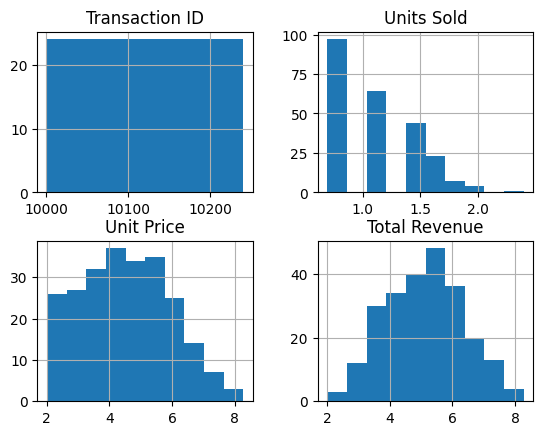

In [23]:
numeric_cols.hist()

In [24]:
monthly_sales_region = df.groupby(['Region', 'Month'])['Total Revenue'].sum().reset_index()

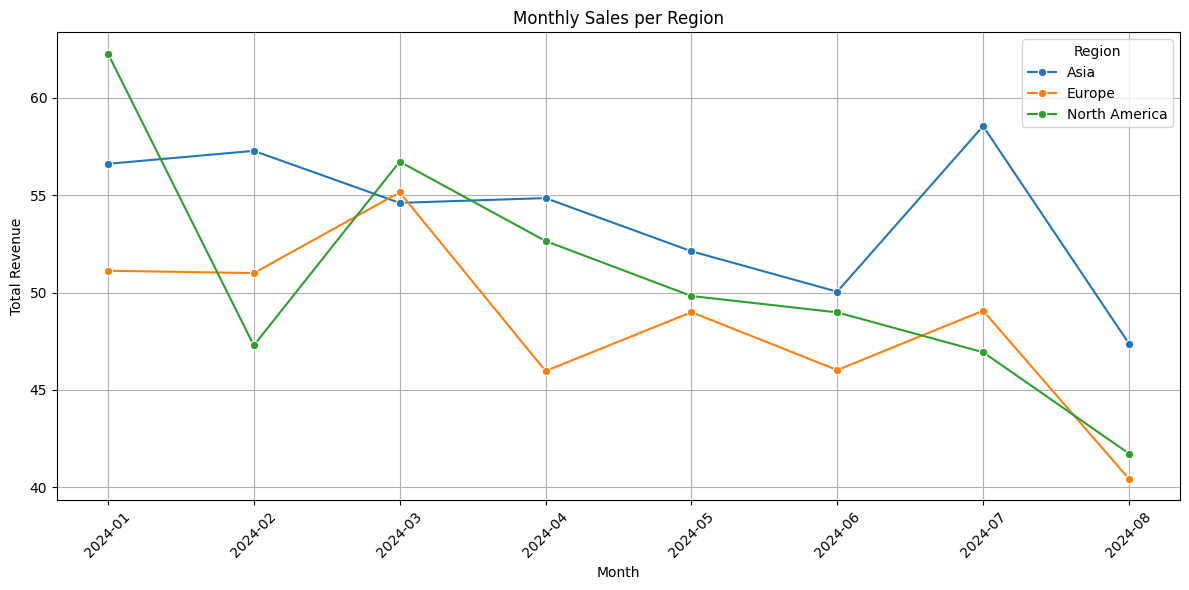

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_region, x='Month', y='Total Revenue', hue='Region', marker='o')
plt.title('Monthly Sales per Region')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
top_5_products = df.groupby('Product Name')['Total Revenue'].sum().sort_values(ascending=False).head(5)

C:\Users\mutte\AppData\Local\Temp\ipykernel_10636\423475031.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_products.values, y=top_5_products.index, palette='coolwarm')


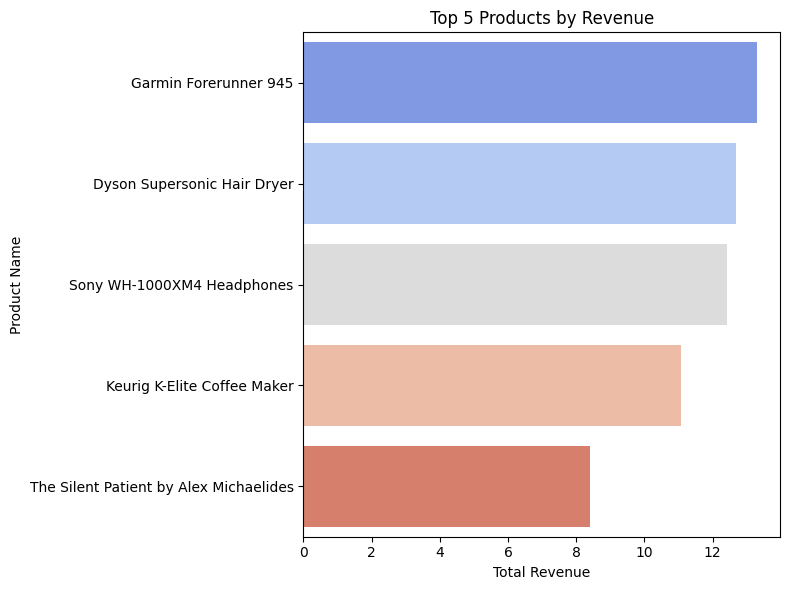

In [28]:
plt.figure(figsize=(8, 6))
sns.barplot(x=top_5_products.values, y=top_5_products.index, palette='coolwarm')
plt.title('Top 5 Products by Revenue')
plt.xlabel('Total Revenue')
plt.tight_layout()
plt.show()

In [26]:
monthly_sales = df.groupby('Month')['Total Revenue'].sum().reset_index()

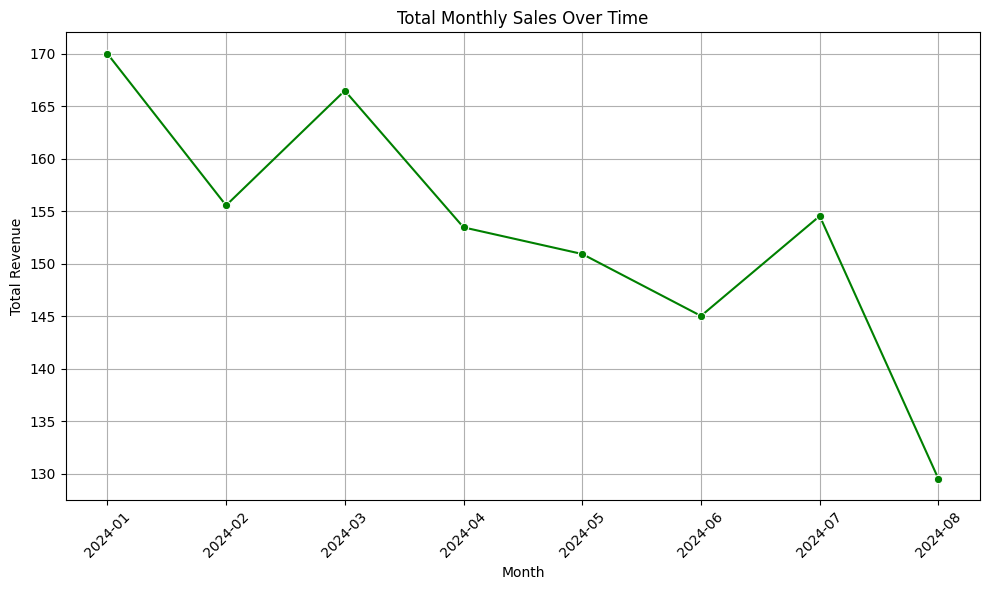

In [29]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Revenue', marker='o', color='green')
plt.title('Total Monthly Sales Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Assignment 2

In [30]:
df=pd.read_csv(r"D:\GeakMinds Internship\real world projects\datasets\online retail\rfm_data.csv")

In [31]:
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [33]:
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

 Set snapshot date (day after the last transaction)

In [34]:
snapshot_date = df['PurchaseDate'].max() + pd.Timedelta(days=1)

In [35]:
rfm = df.groupby('CustomerID').agg({
    'PurchaseDate': lambda x: (snapshot_date - x.max()).days,
    'OrderID': 'nunique',
    'TransactionAmount': 'sum'
}).reset_index()

In [36]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

1 = lowest , 5 = highest

In [37]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])


In [38]:
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)

In [39]:
def segment(score):
    if score >= 13:
        return 'Champions'
    elif score >= 10:
        return 'Loyal Customers'
    elif score >= 6:
        return 'Potential'
    else:
        return 'At Risk'
rfm['Segment'] = rfm['RFM_Score'].apply(segment)


Recency: Days since last purchase

Frequency: Unique order count

Monetary: Total spend

Segment: Customer group like Champions, At Risk, etc.

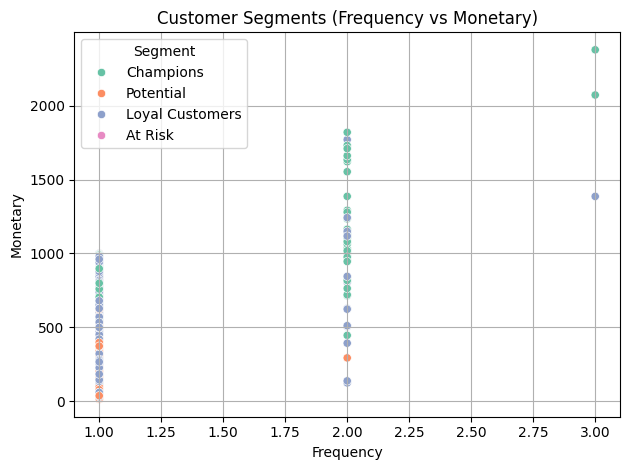

In [42]:
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Segment', palette='Set2')
plt.title('Customer Segments (Frequency vs Monetary)')
plt.grid(True)
plt.tight_layout()
plt.show()


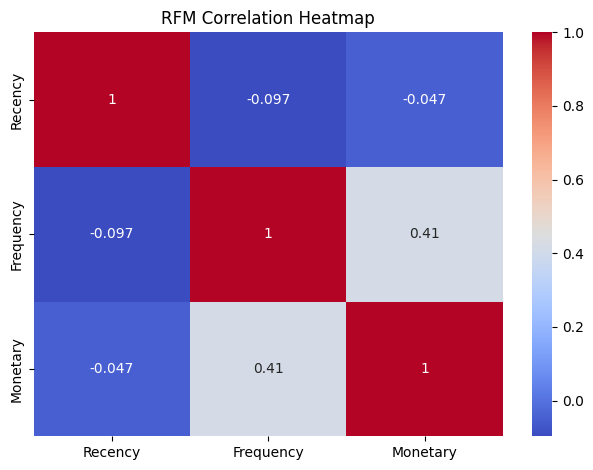

In [41]:
sns.heatmap(rfm[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm')
plt.title('RFM Correlation Heatmap')
plt.tight_layout()
plt.show()

# Assignment 3

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"D:\GeakMinds Internship\real world projects\datasets\hr data anlytics.csv")

In [44]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [48]:
df['AttritionFlag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

percentage of employees who leave a company in dept level

In [49]:
dept_attrition = df.groupby('Department')['AttritionFlag'].mean().reset_index()
dept_attrition.columns = ['Department', 'AttritionRate']

In [55]:
dept_attrition

,Department,AttritionRate
0,Human Resources,0.190476
1,Research & Development,0.138398
2,Sales,0.206278


C:\Users\mutte\AppData\Local\Temp\ipykernel_10636\621232850.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dept_attrition, x='Department', y='AttritionRate', palette='Set2')


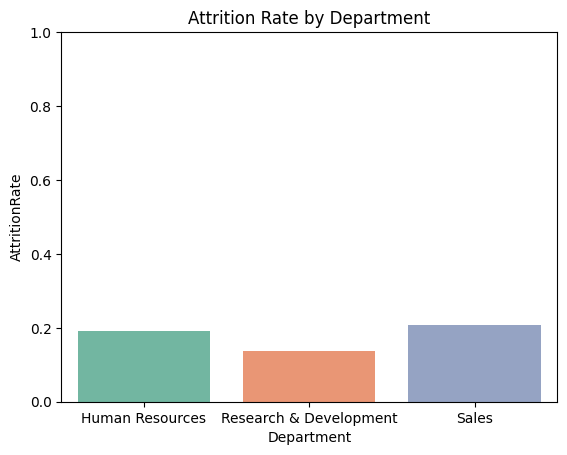

In [51]:
sns.barplot(data=dept_attrition, x='Department', y='AttritionRate', palette='Set2')
plt.title("Attrition Rate by Department")
plt.ylim(0, 1)
plt.show()

percentage of employees who leave a company in job level

In [50]:
joblevel_attrition = df.groupby('JobLevel')['AttritionFlag'].mean().reset_index()
joblevel_attrition.columns = ['JobLevel', 'AttritionRate']

C:\Users\mutte\AppData\Local\Temp\ipykernel_10636\3415861928.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=joblevel_attrition, x='JobLevel', y='AttritionRate', palette='Set3')


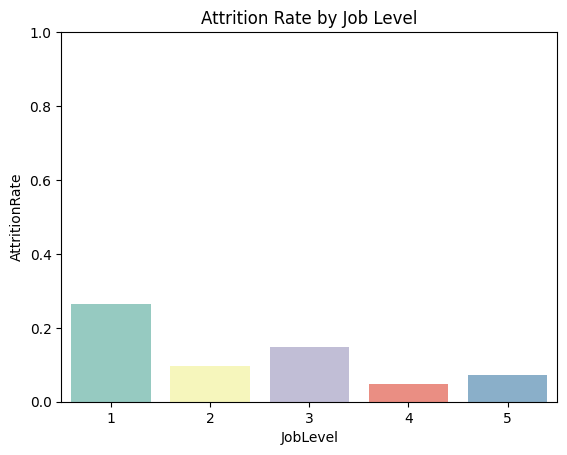

In [53]:
sns.barplot(data=joblevel_attrition, x='JobLevel', y='AttritionRate', palette='Set3')
plt.title("Attrition Rate by Job Level")
plt.ylim(0, 1)
plt.show()

In [54]:
dept_attrition.to_csv("department_attrition.csv", index=False)
joblevel_attrition.to_csv("joblevel_attrition.csv", index=False)
df.to_csv("processed_hr_data.csv", index=False)

In [56]:
corr_vars = ['Age', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears',
             'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'AttritionFlag']

corr_matrix = df[corr_vars].corr()

final_output = df.merge(dept_attrition, on='Department', how='left')
final_output = final_output.merge(joblevel_attrition, on='JobLevel', how='left')


In [58]:
final_output.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AttritionFlag,AttritionRate_x,AttritionRate_y
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,1,0.206278,0.097378
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,0,0.138398,0.097378
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,1,0.138398,0.263352
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,0,0.138398,0.263352
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,0,0.138398,0.263352


# at power bi

In [59]:
import pandas as pd

df=pd.read_csv(r"D:\GeakMinds Internship\real world projects\datasets\hr data anlytics.csv")

df['AttritionFlag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

dept_attrition = df.groupby('Department')['AttritionFlag'].mean().reset_index()
dept_attrition.columns = ['Department', 'AttritionRate']

joblevel_attrition = df.groupby('JobLevel')['AttritionFlag'].mean().reset_index()
joblevel_attrition.columns = ['JobLevel', 'AttritionRate']

corr_vars = ['Age', 'JobLevel', 'MonthlyIncome', 'TotalWorkingYears',
             'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'AttritionFlag']

corr_matrix = df[corr_vars].corr()

final_output = df.merge(dept_attrition, on='Department', how='left')
final_output = final_output.merge(joblevel_attrition, on='JobLevel', how='left')


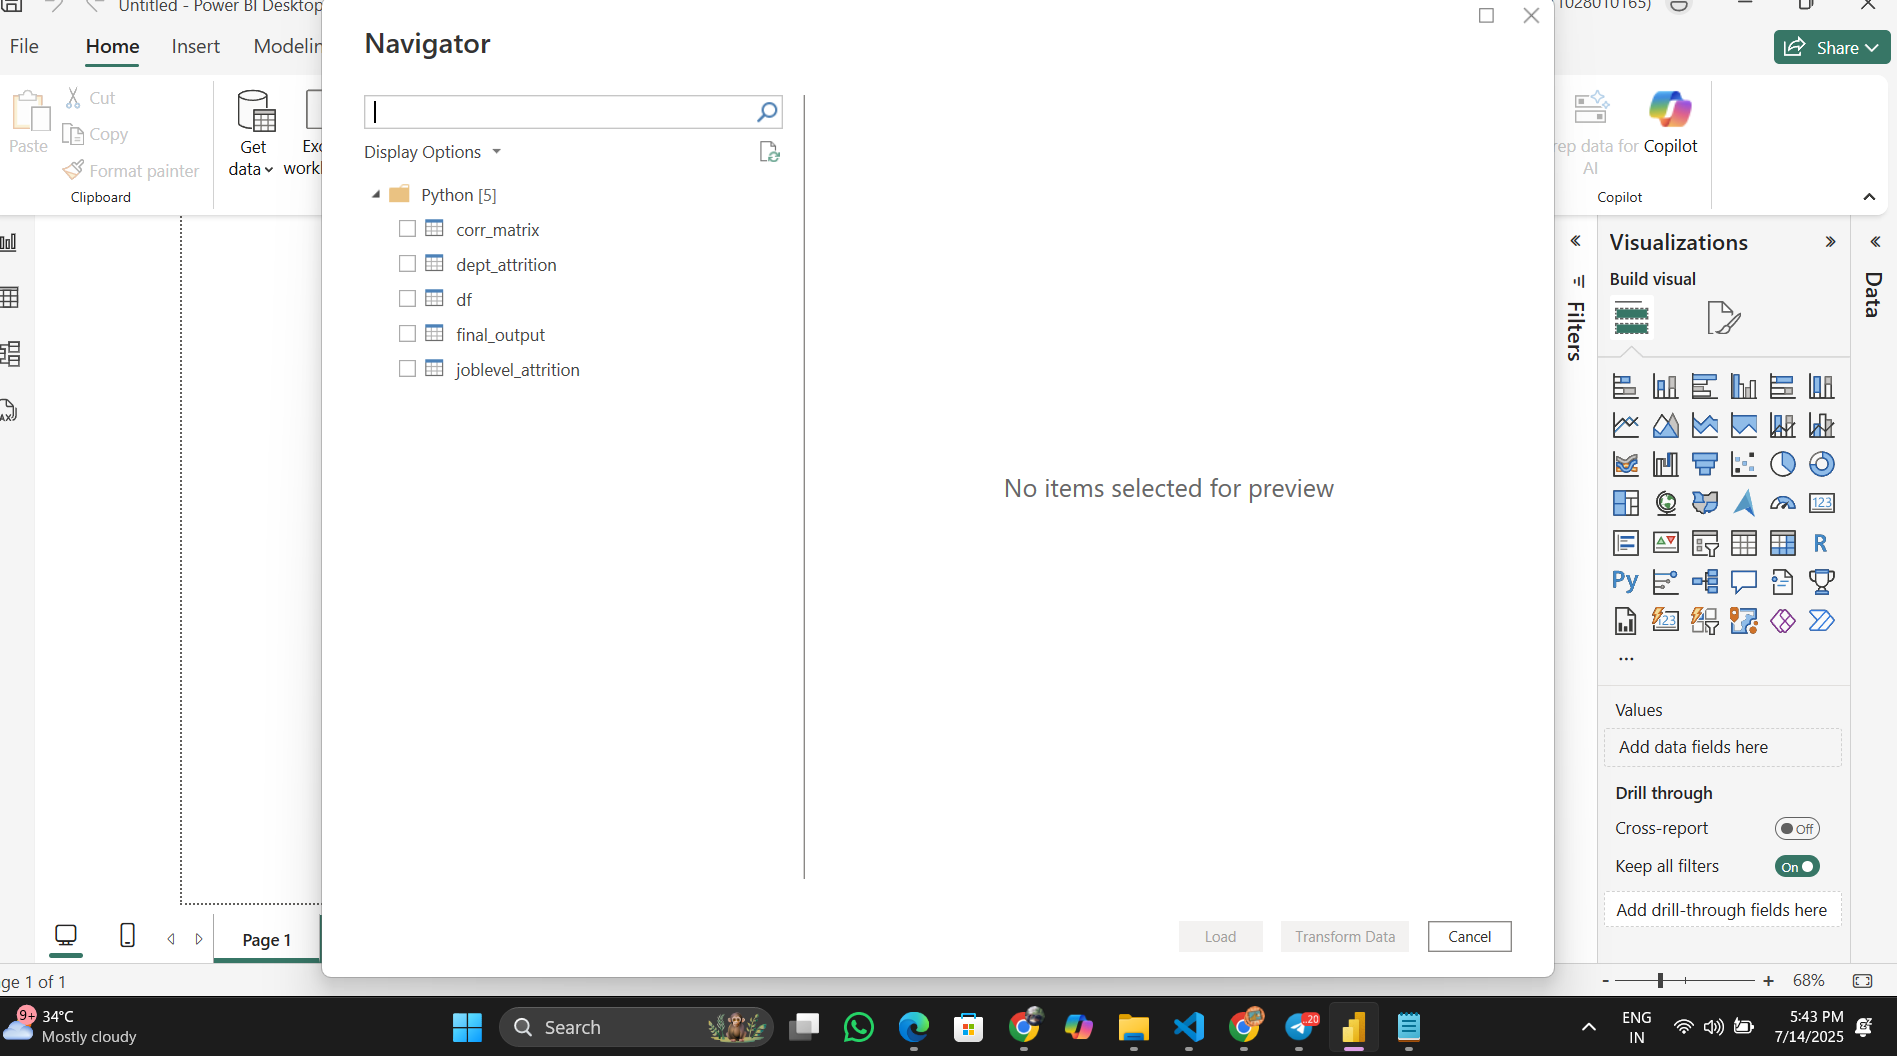

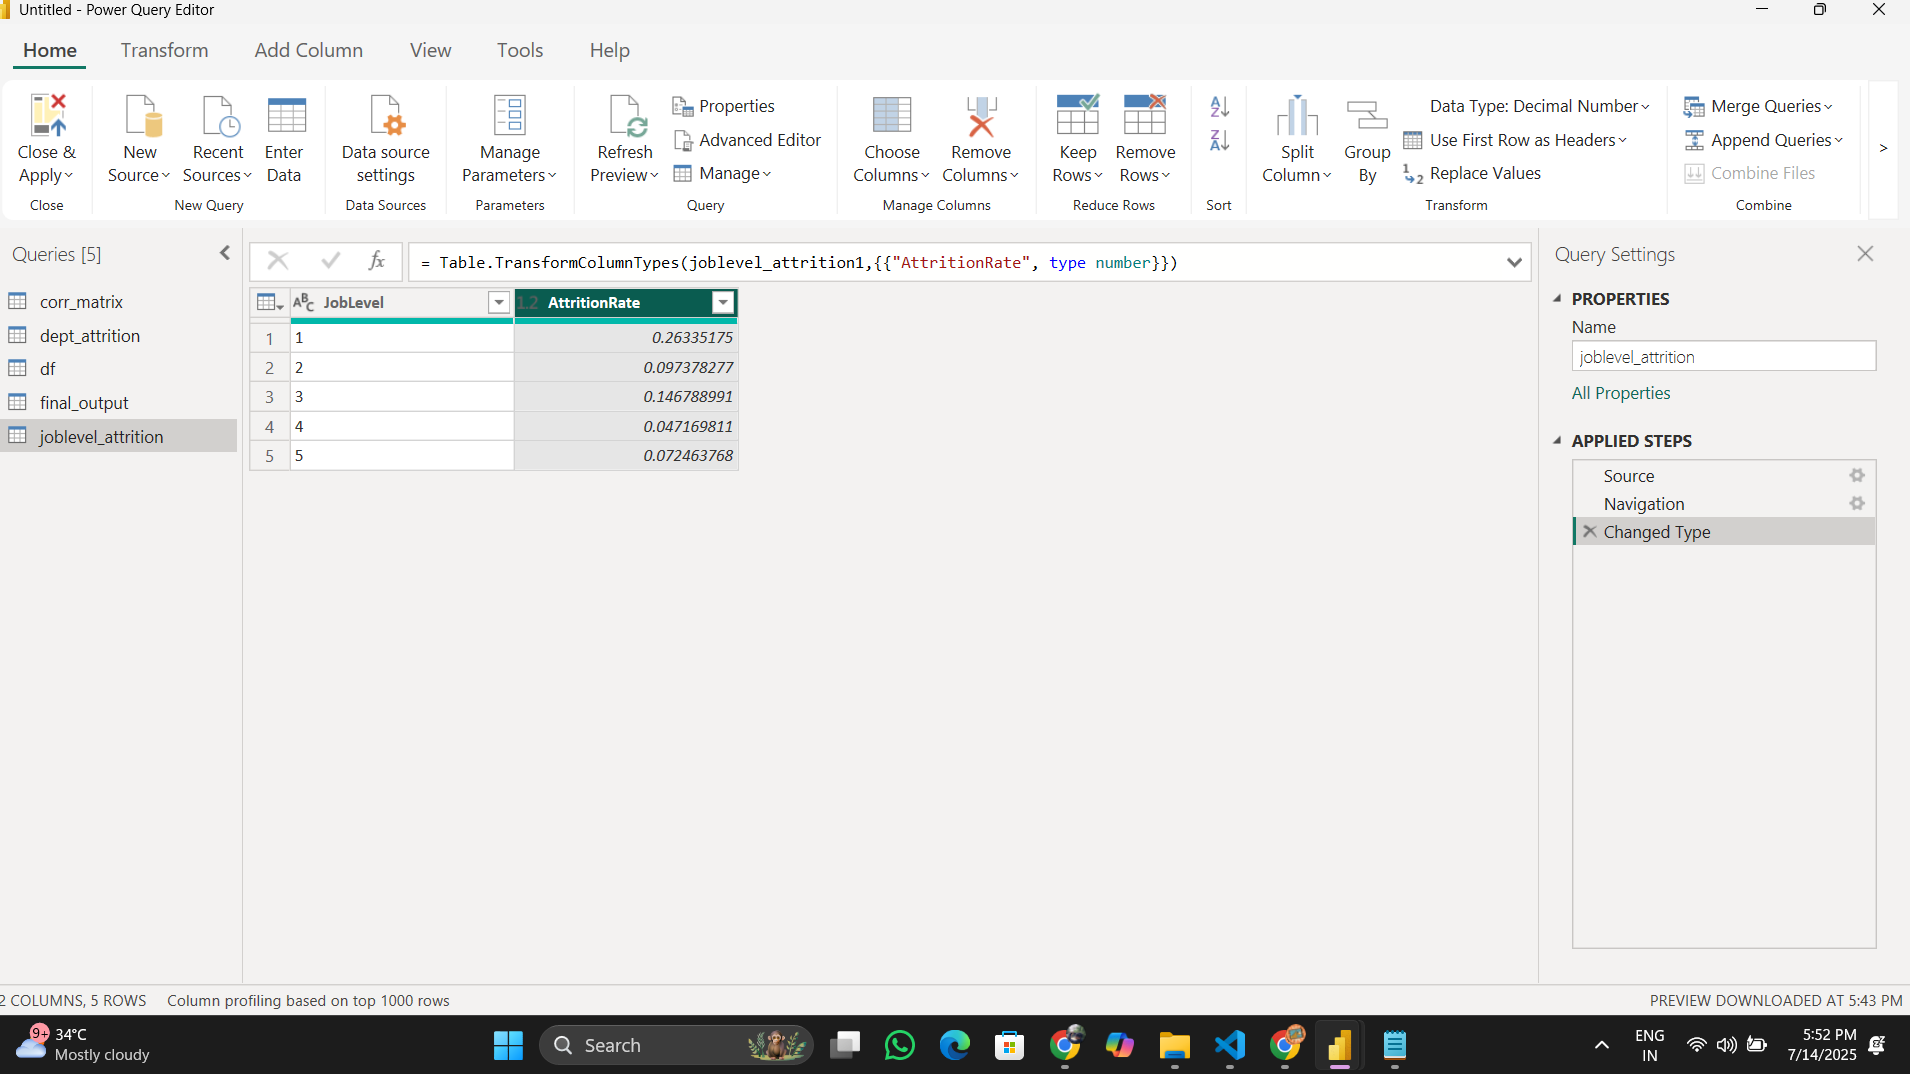